In [116]:
import sys  
# sys.path.insert(1, '/home/t00876569/scaling_timeseries/')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import hvplot.pandas
import holoviews as hv
import random
from collections import namedtuple
from script_stats import ModelEvaluator
from collections import namedtuple

hv.renderer('bokeh').theme = 'dark_minimal'
%matplotlib inline

In [117]:
np.random.seed(43)
N = 1
T = 24 * 3
_N = 4.0
P = 24
size_vali_test = 12
std = 0.05


signals = [np.arange(T * (2 * P)).astype(int) + 1]
input_signal = np.sin(np.pi / (2 * P) * np.arange(P)) 

eps = 1e-6
eps2 = 5e-6
S = (1 - eps2) * np.sin(np.pi / (2 * (P - 1)) * np.arange(P) + np.pi / 2) / _N

# output = [
#     (np.sin(np.pi / (2 * P) * np.arange(P) + np.pi / 2) / _N + 0.75 - 0 * 0.25),
#     (np.sin(np.pi / (2 * P) * np.arange(P) + np.pi / 2) / _N + 0.75 - 1 * 0.25),
#     (np.sin(np.pi / (2 * P) * np.arange(P) + np.pi / 2) / _N + 0.75 - 2 * 0.25),
#     (np.sin(np.pi / (2 * P) * np.arange(P) + np.pi / 2) / _N + 0.75 - 3 * 0.25)
# ]
# out =  np.sin(np.pi / (2 * (P - 1)) * np.arange(P) + np.pi / 2) / _N + eps)

# output = [
#     ((1 - eps2) * np.sin(np.pi / (2 * (P - 1)) * np.arange(P) + np.pi / 2) / _N + eps + 0.75),
#     ((1 - eps2) * np.sin(np.pi / (2 * (P - 1)) * np.arange(P) + np.pi / 2) / _N + eps + 0.5),
#     (-(1 - eps2) * np.sin(np.pi / (2 * (P - 1)) * np.arange(P) + np.pi / 2) / _N + eps + 0.25),
#     (-(1 - eps2) * np.sin(np.pi / (2 * (P - 1)) * np.arange(P) + np.pi / 2) / _N + eps + 0.5)
# ]

output = [S + 0.75 + eps, S + 0.5 + eps, -S + 0.25 - eps, -S + 0.5 - eps]

for __ in range(N):
    signal = []
    train_signals = []
    for order in range(T - 2 * size_vali_test):
        train_signal = []
        train_signal.extend(input_signal)
        train_signal.extend(output[order % 4])
        train_signals.append(train_signal)
    random.shuffle(train_signals)
    for it_train_signal in train_signals:
        signal.extend(it_train_signal)
    
    for order in range(2 * size_vali_test):
        signal.extend(input_signal)
        signal.extend(output[order % 4])
    
    signal = np.array(signal)
    signal +=  np.random.normal(loc=0, scale=std, size=signal.size)
    signals.append(signal)

In [118]:
df = pd.DataFrame(np.array(signals).T, columns=['date'] + [f'V-{i}' for i in range(N-1)] + ['OT'])
df ['date'] = df['date'].astype(int)
df.shape

(3456, 2)

In [119]:
i = 0
_T = 500
target = 'OT'
O = (df[target]+i)[:_T].hvplot()
for i in range(_T//24 + 1):
    O = O*hv.VLine(i * 24,).opts( color = 'black', line_dash= 'dashed', line_width = 1.0)
for k in range(1):
    for i in range(5):
        O = O*hv.HLine((i) * .25 + k * 1.5).opts( color = 'black', line_dash= 'dashed', line_width = 1.0)
O = O.opts(height = 200, width = 1000)
O

:Overlay
   .Curve.OT    :Curve   [index]   (OT)
   .VLine.I     :VLine   [x,y]
   .VLine.II    :VLine   [x,y]
   .VLine.III   :VLine   [x,y]
   .VLine.IV    :VLine   [x,y]
   .VLine.V     :VLine   [x,y]
   .VLine.VI    :VLine   [x,y]
   .VLine.VII   :VLine   [x,y]
   .VLine.VIII  :VLine   [x,y]
   .VLine.IX    :VLine   [x,y]
   .VLine.X     :VLine   [x,y]
   .VLine.XI    :VLine   [x,y]
   .VLine.XII   :VLine   [x,y]
   .VLine.XIII  :VLine   [x,y]
   .VLine.XIV   :VLine   [x,y]
   .VLine.XV    :VLine   [x,y]
   .VLine.XVI   :VLine   [x,y]
   .VLine.XVII  :VLine   [x,y]
   .VLine.XVIII :VLine   [x,y]
   .VLine.XIX   :VLine   [x,y]
   .VLine.XX    :VLine   [x,y]
   .VLine.XXI   :VLine   [x,y]
   .HLine.I     :HLine   [x,y]
   .HLine.II    :HLine   [x,y]
   .HLine.III   :HLine   [x,y]
   .HLine.IV    :HLine   [x,y]
   .HLine.V     :HLine   [x,y]

0.750001 -> 0.9999997500000001
0
0.500001 -> 0.7499997500000001
1
2.5000000000818905e-07 -> 0.24999899999999997
2
0.25000025000000003 -> 0.49999899999999997
3
0.5


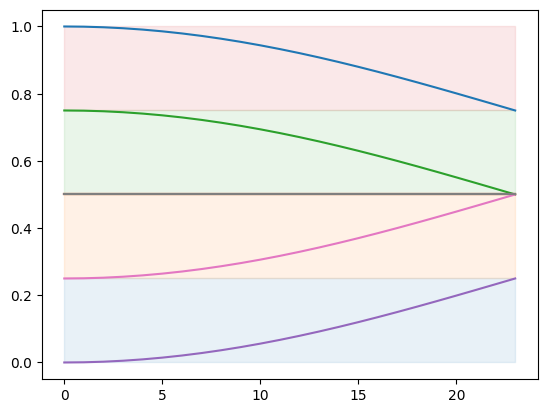

In [120]:
for i, out in enumerate(output):
    print(min(out),'->',max(out))
    plt.plot(out)
    plt.plot(np.mean(output, axis = 0))
    plt.fill_between([0,23],[i*.25]*2 ,[(i+1) * .25]*2, color =f'C{i}', alpha = .1)#[i*.25, (i+1)*.25])
    print(i)
print(np.mean(output, axis = 0)[0])

In [121]:
df.to_csv(f'/home/l50046526/scaling_timeseries/dataset/wireless/toy_example_10_03_better_{std}_N_{N}_T_{df.shape[0]}.csv', index=False)